# Homework 1: Decision tree, K-nearest neighbor, and the Bias-Variance Trade-Off



This assignment is due on Moodle by **11:59pm on Friday Sep 13**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API, **do not** change it.  If we do not provide a function API, then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

**Acknowledgment**: Noah Smith, Chris Ketelsen

**Please put your name and cuidentity key.**

**Name**: Swarnalatha Natarajan 
**CUIdentity Key**: swna2675

In [1]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [30 points] Problem 1 - Decision tree
***

Consider the problem of predicting whether a person has a college degree based on age, salary, and Colorado residency. 
The dataset looks like the following.

| Age   | Salary         | Colorado Residency      | College degree| 
|:------:|:------------:| :-----------:|---:|
| 27 | 41,000 | Yes | Yes |
| 61 | 52,000 | No | No |
| 23 | 24,000 | Yes | No |
| 29 | 77,000 | Yes | Yes |
| 32 | 48,000 | No | Yes |
| 57 | 120,000 | Yes | Yes |
| 22 | 38,000 | Yes | Yes |
| 41 | 45,000 | Yes | No |
| 53 | 26,000 | No | No |
| 48 | 65,000 | Yes | Yes |


**Part 1 [5 points]**: Convert the above table to data. Two variables should be created:
        
1. $x$ is a $10*3$ matrix that contains the data from columns 0, 1, and 2. Colorado residency is represented by 1 (yes) and 0 (no).
2. $y$ contains the labels (college degree), 1 (yes) and 0 (no).

In [2]:
# YOUR CODE HERE
x = np.matrix([[27, 41000, 1],[61,52000, 0],[23,24000,1],[29,77000,1],[32,48000,0],[57,120000,1],[22,38000,1],[41,45000,1],[53,26000,0],[48,65000,1]])
y = [1,0,0,1,1,1,1,0,0,1]
#raise NotImplementedError()

**Part 2 [16 points]:** Criteria for choosing a feature to split.

**[2 points]** We start with no splitting. Assuming that our algorithm is deterministic, what is the smallest number of mistakes we can make if we do not use any of the features and what is the algorithm? (**Write your answer in the Markdown cell below.**)

Assuming that our algorithm is deterministic, the smallest number of mistakes we can make if we do not use any of the features is 4 and the algorithm is Decision stump algorithm.

**[5 points]** We start by considering the variable *Colorado residency*. The first criteria is based on the number of mistakes. We need to build a contingency table between Colorado residency and college degree.

How many mistakes will we make if we split based on Colorado residency? (**Answer below by finishing the code.**)

In [3]:
def get_error_in_leaf(y, ids):
    """
    Returns the errors in a leaf node of a decision tree.
    This function can be used to answer the previous question automatically.
    
    :@param y: all labels
    :@param ids: the subset of indexes in the leaf node
    """
    # YOUR CODE HERE
    n=0
    p=0
    for id in ids:
        if y[id]==0:
            n=n+1
        else:
            p=p+1    
    return min(n,p)
    raise NotImplementedError()

def error_criteria(y, root, left_child, right_child):
    """
    Returns the number of errors if we split the root into the left child and the right child.
    
    :@param y: all labels
    :@param root: indexes of all the data points in the root
    :@param left_child: the subset of indexes in the left child
    :@param right_child: the subset of indexes in the right child
    """
    # YOUR CODE HERE
    left_child_minority=get_error_in_leaf(y,left_child);
    right_child_minority=get_error_in_leaf(y,right_child);
    return left_child_minority+right_child_minority;
    raise NotImplementedError()

def value_split_binary_feature(x, y, fid, root, criteria_func):
    left_child = [i for i in root if x[i,fid] == 0]
    right_child = [i for i in root if x[i,fid] == 1]
    return criteria_func(y, root, left_child, right_child)

# Colorado residency should correpsond to the third column in your data x
fid = 2
root = list(range(len(y))) # root includes all data points
mistakes = value_split_binary_feature(x, y, fid, root, error_criteria)
mistakes

3

**[3 points]** Alternatively, we can use information gain to split the data. To get you familiar with MathJax, please write the equation necessary to compute information gain if we split data $D$ into $D_1$ and $D_2$. **Write your answer in the Markdown cell below.**

$$IG(X_D,i) = H(X_D) - \frac{|X_{i,D_1}|}{|X_D|}\times H(X_{D_1}) - \frac{|X_{i,D_2}|}{|X_D|}\times H(X_{D_2})$$

**[6 points]** Now we write a function for computing information gain. Use log2 for entropy computation.

In [128]:
def entropy(y, ids):
    """
    Returns the entropy in the labels for the data points in ids.
    
    :@param y: all labels
    :@param ids: the indexes of data points
    """
    if len(ids) == 0: # deal with corner case when there is no data point.
        return 0
    # YOUR CODE HERE
    p=0
    for i in ids:
        if y[i]==1:
            p=p+1
    p=p/len(ids)
    n=1-p
    logp=np.log2(p) if p>0 else 0
    logn=np.log2(n) if n>0 else 0
    en=-p*logp-n*logn
    return en
    raise NotImplementedError()
    
def information_gain_criteria(y, root, left_child, right_child):
    """
    Returns the information gain by splitting root into left child and right child.
    
    :@param y: all labels
    :@param root: indexes of all the data points in the root
    :@param left_child: the subset of indexes in the left child
    :@param right_child: the subset of indexes in the right child
    """
    # YOUR CODE HERE
    entropy_D=entropy(y,root);
    entropy_D1=entropy(y,left_child);
    entropy_D2=entropy(y,right_child);
    info_gain=entropy_D-(len(left_child)/len(root))*entropy_D1-(len(right_child)/len(root))*entropy_D2
    return info_gain
    raise NotImplementedError()
    
fid = 2
root = list(range(len(y))) # root includes all data points
IG_ColoradoResidency= value_split_binary_feature(x, y, fid, root, information_gain_criteria)  
print("Information gain : ",IG_ColoradoResidency)


Information gain :  0.0912774462416801


**Part 3 [9 points]**: Deal with continuous features.
    
**[6 points]** One way to deal with continuous (or ordinal) data is to define binary features based on thresholding of continuous features like Age and Salary.
For example, you might convert ages to 0 if age is less than or equal to 50 and 1 otherwise.

In [129]:
def value_split_continuous_feature(x, y, fid, root, criteria_func=information_gain_criteria):
    """
    Return the best value and its corresponding threshold by splitting based on a continuous feature.

    :@param x: all feature values
    :@param y: all labels
    :@param fid: feature id to split the tree based on
    :@param root: indexes of all the data points in the root
    :@param criteria_func: the splitting criteria function
    """
    best_value, best_thres = 0, 0
    # YOUR CODE HERE
    for row in root:
        thres=x[row,fid]
        #print(thres)
        left_child = [i for i in root if x[i,fid] <= thres]
        right_child = [i for i in root if x[i,fid] > thres]
        info_gain=information_gain_criteria(y, root, left_child, right_child)
        if info_gain>=best_value:
            best_thres=thres
            best_value=info_gain
    #raise NotImplementedError()
    return best_value, best_thres

root = list(range(len(y))) # root includes all data points
fid = 0
age_value, age_thres = value_split_continuous_feature(x, y, fid, root, information_gain_criteria)
IG_Age=age_value
print(age_value,age_thres)
fid = 1
salary_value, salary_thres = value_split_continuous_feature(x, y, fid, root, information_gain_criteria)
IG_Salary=salary_value
print(salary_value,salary_thres)

0.1444843438056279 57
0.3219280948873623 26000


**[3 points]** Based on the current information gain by splitting different features, if we build a decision stump (decision tree with depth 1) greedily, which feature should we choose? Why? **Write down your answer in the Markdown cell below.**

Based on the current information gain by splitting different features, if we build a decision stump (decision tree with depth 1) greedily, we should choose the feature Salary. This because only for this feature the information gain is maximum.

**Extra credit [5 points]**: You now have all the ingredients to build a decision tree recursively. You can build a decision tree of depth two and report its classification error on the training data and the tree.

In [131]:
# YOUR CODE HERE
def minority(y):
    c, least = len(y), 0
    for x in y:
        if y.count(x) <= c :
            c = y.count(x)
            least = x
    return c
def split_feature(x,y,fid,root,thres,flag):
    if(flag==1):
        left_child = [i for i in root if x[i,fid] <=thres]
        right_child = [i for i in root if x[i,fid] > thres]
    else:
        left_child = [i for i in root if x[i,fid] ==0]
        right_child =[i for i in root if x[i,fid]==1]
    return left_child,right_child
def DTreeTrain(x,y,features,root,depth_max):
    error=0
    result=False
    #Base conditions
    #1. all examples in D have the same label y or no feat
    if len(y) > 0 :
        result = all(elem == y[0] for elem in y)
    if result or len(features)==0 or depth_max==0:
        return 0
    else:
        Best_IG=0
        Best_feature=0
        for feature in features:
            if feature in [0,1]:
                IG,thres=value_split_continuous_feature(x,y,feature,root,information_gain_criteria)
            else:
                IG=value_split_binary_feature(x, y,feature,root,information_gain_criteria)  
            if(IG>=Best_IG):
                Best_IG=IG
                Best_feature=feature
        print("Depth ",depth_max," Best feature ",Best_feature," IG ",Best_IG)
        features.remove(Best_feature)
        if Best_feature in [0,1]:
            left_child,right_child=split_feature(x,y,Best_feature,root,thres,1)  
        else :
            left_child,right_child=split_feature(x,y,Best_feature,root,0,0)  
        error+=error_criteria(y,root, left_child, right_child)
        print("Left : ",left_child,"\nRight : ",right_child)
        DTreeTrain(x,y,features.copy(),left_child,depth_max-1)
        DTreeTrain(x,y,features.copy(),right_child,depth_max-1)
    return error
    

features=[0,1,2]
depth_max=2
error=DTreeTrain(x,y,features,range(len(y)),depth_max)
print("Error : ",error)
print("Error rate : ",error/len(y))

#raise NotImplementedError()

Depth  2  Best feature  1  IG  0.3219280948873623
Left :  [2, 8] 
Right :  [0, 1, 3, 4, 5, 6, 7, 9]
Depth  1  Best feature  2  IG  0.0
Left :  [8] 
Right :  [2]
Depth  1  Best feature  0  IG  0.31127812445913283
Left :  [0, 3, 4, 6] 
Right :  [1, 5, 7, 9]
Error :  2
Error rate :  0.2


### [35 points] Problem 2- KNN for Handwritten Digit Recognition 
***

In this problem you'll implement a K-Nearest Neighbor framework to take an image of a handwritten digit and predict which digit it corresponds to.  

![Samples of Handwritten Digits](figs/mnist.png "MNIST Digits")

To keep run times down we'll only consider the subset of the MNIST data set consisting of the digits $3, 7, 8$ and $9$. 

**Part A [6 points]**: Executing the following cells will load training and validation data and plot an example handwritten digit.  Explore the training and validation sets and answer the following questions: 

- How many pixels are in each image in the data set?  
- How many examples are there from each class in the training set? 
- How many examples are there from each class in the validation set? 

In [132]:
X_train, y_train, X_valid, y_valid = pickle.load(gzip.open("data/mnist21x21_3789.pklz", "rb"))

In [133]:
def view_digit(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(21,21), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)

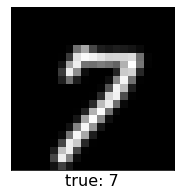

In [8]:
training_index = 0
view_digit(X_train[training_index], y_train[training_index])

In [134]:
# Write code for answering the questions in Part A and then put your answer in the Markdown cell below.
# Make sure to set each of the variables below to the correct value. Do not rename the variables.
N_pixels_per_img = None
N_training_examples = None
N_validation_examples = None
# YOUR CODE HERE
from collections import Counter
N_pixels_per_img,N_training_examples,N_validation_examples=len(X_train[0]),Counter(y_train),Counter(y_valid)
print("Number of pixels in each image : ",N_pixels_per_img)
print("Number of examples in training set : ",N_training_examples)
print("\Number of examples in validation set : ",N_validation_examples)
#raise NotImplementedError()

Number of pixels in each image :  441 
Number of examples in training set :  Counter({7: 1000, 9: 1000, 3: 1000, 8: 1000}) 
Number of examples in validation set :  Counter({8: 250, 9: 250, 7: 250, 3: 250})


Number of pixels in each image :  441 
Number of examples in training set : 4000
        class 7 has 1000 examples
        class 9 has 1000 examples
        class 3 has 1000 examples
        class 8 has 1000 examples
Number of examples in validation set : 1000
        class 7 has 250 examples
        class 9 has 250 examples
        class 3 has 250 examples
        class 8 has 250 examples

In [135]:
class KNN:
    """
    Class to store data for regression problems 
    """
    def __init__(self, X_train, y_train, K=5, distance_weighted=False):
        """
        Creates a kNN instance

        :param X_train: Training data input in 2D ndarray 
        :param y_train: Training data output in 1D ndarray 
        :param K: The number of nearest points to consider in classification
        :param distance_weighted: Bool indicating whether to use distance weighting
        """
        
        # Import and build the BallTree on training features 
        from sklearn.neighbors import BallTree
        self.balltree = BallTree(X_train)
        
        # Cache training labels and parameter K 
        self.y_train = y_train
        self.K = K 
        
        # Boolean flag indicating whether to do distance weighting 
        self.distance_weighted = distance_weighted
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """
        # YOUR CODE HERE
        if(self.distance_weighted==False):
            y=[self.y_train[ind] for ind in neighbor_indices]
            #print("Y : ",y)
            counts=Counter(y)
            #print("Counts : ",counts)
            flag=0
            if len(counts)>1:
                most_common=counts.most_common(2)
                if most_common[0][1]==most_common[1][1]: 
                    flag=1
            if(flag==0):
                #No Tie
                most_common=counts.most_common(1)
                return most_common[0][0]
            else:
                #Tie
                #Neighbor_distances in incresing order so delete last neighbor's index 
                reduced_neighbor_indices=neighbor_indices[:-1]
                return self.majority(reduced_neighbor_indices)
            
        else: #WEIGHTED KNN#
            classes={}
            for i in range(len(neighbor_indices)):
                index=neighbor_indices[i]
                c =self.y_train[index]
                if c in classes :
                    if neighbor_distances[i]==0:
                        classes[c]+=999999 
                    else:
                        classes[c]+=1/neighbor_distances[i] 
                else:
                    if neighbor_distances[i]==0:
                        classes[c]=999999 
                    else:
                        classes[c]=1/neighbor_distances[i]  
            v=list(classes.values())
            k=list(classes.keys())
            label= k[v.index(max(v))]
            Ties = [(i,j) for i in classes for j in classes if (classes[i]==classes[j]).all() and i != j and classes[i]==max(v)]
            if(len(Ties)==0):
                return label
            else: 
            #Tie
                #Neighbor_distances in incresing order so delete last neighbor's index 
                reduced_neighbor_indices=neighbor_indices[:-1]
                reduced_neighbor_distances=neighbor_distances[:-1]
                return self.majority(reduced_neighbor_indices,reduced_neighbor_distances)
        #raise NotImplementedError() 

    def classify(self, x):
        """
        Given a query point, return the predicted label 
        
        :param x: a query point stored as an ndarray  
        """
        # YOUR CODE HERE
        neighbor_distances, neighbor_indices = self.balltree.query(x.reshape(1,-1), self.K) 
        if(self.distance_weighted==False):
            return self.majority(neighbor_indices[0],neighbor_distances[0])
        else:
            return self.majority(neighbor_indices[0],neighbor_distances[0])
        raise NotImplementedError()
        
    def predict(self, X):
        """
        Given an ndarray of query points, return yhat, an ndarray of predictions 

        :param X: an (m x p) dimension ndarray of points to predict labels for 
        """
        # YOUR CODE HERE
        self.X=X
        predicted_labels=[self.classify(x) for x in X]
        return predicted_labels
        raise NotImplementedError()

**Part B [10 points]**: Modify the class above to implement an Unweighted KNN classifier.  There are three methods that you need to complete: 

- `predict`: Given an $m \times p$ matrix of validation data with $m$ examples each with $p$ features, return a length-$m$ vector of predicted labels by calling the `classify` function on each example. 
- `classify`: Given a single query example with $p$ features, return its predicted class label as an integer using KNN by calling the `majority` function. 
- `majority`: Given an array of indices into the training set corresponding to the $K$ training examples that are nearest to the query point, return the majority label as an integer.  If there is a tie for the majority label using $K$ nearest neighbors, reduce $K$ by 1 and try again.  Continue reducing $K$ until there is a winning label. 

**Notes**: 
- Don't even think about implementing nearest-neighbor search or any distance metrics yourself.  Instead, go read the documentation for Scikit-Learn's [BallTree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html) object.  You will find that its implemented [query](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree.query) method can do most of the heavy lifting for you. 
- **Do not** use Scikit-Learn's KNeighborsClassifier in this problem.  We're implementing this ourselves. 
- You don't need to worry about the `distance_weighted` flag until **Part C**, but we recommend reading ahead a bit. It might be good to think about your implementation of **Part C** before implementing **Part B**. 
- When you think you're done, execute the following cell to run 4 unit tests based on the example starting on Slide 15 of the [KNN Lecture](https://chenhaot.com/courses/csci4622/slides/lec5.pdf).  

In [136]:
from tests import tests
tests.run_test_suite('prob 2A', KNN)

test1NNclassify (tests.tests.TestUnweightedKNN) ... ok
test2NNclassify (tests.tests.TestUnweightedKNN) ... ok
test3NNclassify (tests.tests.TestUnweightedKNN) ... ok
test3NNpredict (tests.tests.TestUnweightedKNN) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


**Part C [5 points]**: Modify the `KNN` class to perform the distance-weighted KNN classification.
The so-called Distance-Weighted KNN classifier assigns weights to the nearest-neighbor training examples proportional to the inverse-distance from the training example to the query point.  Classification is performed by summing the weights associated with each class and predicting the class with the highest weighted-majority vote.  Mathematically we might describe the weighted-vote for a class $c$ as 

$$
\textrm{Weighted-Vote}(c) = \displaystyle\sum_{i \in {\cal N}_K} I(y_i = c) \times \dfrac{1}{\|{\bf x}_i - {\bf x}\|}
$$

A word of caution: it's certainly possible that a query point could be distance $0$ away from some training example.  If this happens your implementation should handle it gracefully and return the appropriate class label.   

When you think you're done, execute the following cell to run three final unit tests corresponding to the example on Slide 21 of the [KNN Lecture](https://chenhaot.com/courses/csci4622/slides/lec5.pdf). Make sure that the changes you make in **Part C** do not affect the unit tests from **Part B**.   


In [4]:
from tests import tests
tests.run_test_suite('prob 2B', KNN)

NameError: name 'KNN' is not defined

**Part D [7 points]**: Use your `KNN` class to perform Unweighted KNN on the validation data with $K=3$ and do the following: 

- **[2 points]** Create a **confusion matrix** (feel free to use the Scikit-Learn [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function).  


In [138]:
knn = KNN(X_train, y_train, K=3, distance_weighted=True)
yhat_valid = knn.predict(X_valid)
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_valid,yhat_valid)
print(C)
#raise NotImplementedError()

[[236   2  10   2]
 [  1 244   1   4]
 [  9   0 233   8]
 [  3   3   0 244]]


- **[2 points]** Based on your confusion matrix, which digits seem to get confused with other digits the most? 

9 gets confused with other digits the most.
When considering just 2 digits, 3 gets misclassified as 8 the most


- **[3 points]** Find one misclassified validation example and plot it with the `view_digit` function along with plots of its three nearest neighbors in the training set. 


8  MISCLASSIFIED AS  9


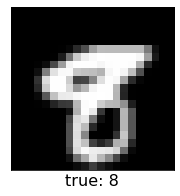

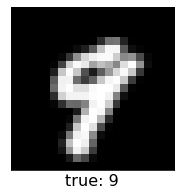

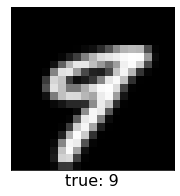

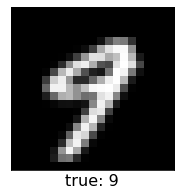

In [141]:
# YOUR CODE HERE
for i in range(len(yhat_valid)):
    if yhat_valid[i]!=y_valid[i]:
        print(y_valid[i]," MISCLASSIFIED AS ",yhat_valid[i])
        view_digit(X_valid[i], y_valid[i])
        neighbor_distances, neighbor_indices = knn.balltree.query(X_valid[i].reshape(1,-1),3) 
        for index in neighbor_indices[0]:
            view_digit(X_train[index],y_train[index])
        break
#raise NotImplementedError()

**Part E [7 points]**: **[4 points]** Create a plot of the accuracy of both Unweighted and Distance-Weighted KNN on the validation set on the same set of axes for $K=1, 2, \ldots, 20$ (feel free to go out to $K=30$ if your implementation is efficient enough to allow it).


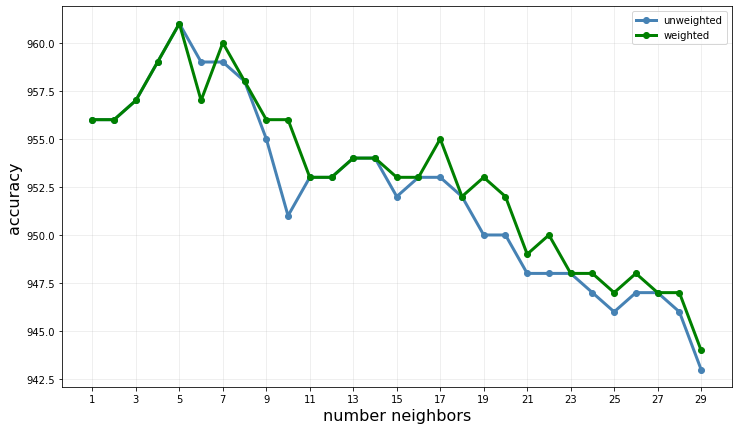

In [142]:
acc = []
wacc = []
allks = range(1,30)

# YOUR CODE HERE
from sklearn.metrics import accuracy_score
for K in allks:
    knn = KNN(X_train, y_train, K, distance_weighted=False)
    yhat_valid = knn.predict(X_valid)
    acc.append(accuracy_score(y_valid,yhat_valid,normalize=False))
    knn = KNN(X_train, y_train, K, distance_weighted=True)
    yhat_valid = knn.predict(X_valid)
    wacc.append(accuracy_score(y_valid,yhat_valid,normalize=False))
#raise NotImplementedError()
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.plot(allks, wacc, marker="o", color="green", lw=3, label="weighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
ax.legend(loc="upper right")
plt.xticks(range(1,31,2))
ax.grid(alpha=0.25)

**[4 points]** Based on the plot, answer the following questions: 

- For general $K$, does Unweighted or Weighted KNN appear to perform better? 
- Which value of $K$ attains the best accuracy on the validation set? 

Open questions: Why do you think this is the case? How can you explain this?

Based on the plot,
1. For general K, Weighted KNN appears to perform better. This is clearly evident in the above plot.
2. K=5 attains the best accuracy on the validation set which is around 97%.

This is because it is more intuitive to classify closer points as the same class. In the case of unweighted KNN, there could be farther points contributing to the majority class while there could be the minority class point coinciding with the point to be classified.

### [30 points] Problem 3 - Polynomial Regression  and the Bias-Variance Trade-Off
***

In this problem you will use polynomial regression to explore the Bias-Variance Trade-Off. Assume that our data comes from a model of the form 

$$Y = f(X) + \epsilon ~~\textrm{ where }~~ \epsilon \sim N(0,\sigma^2)$$ 

For our experiments we'll use $f(x) = \sin(\pi x)$. The following functions can be used to generate data from this distribution:    

In [17]:
def get_f(x):
    """
    Returns sin(pi*x) for array of x values
    
    :@param x: ndarray of feature values
    """
    return np.sin(np.pi * x)

**Part A [6 points]**: **[3 points]** Generate a sample of size $n=20$ for $x$-values chosen from a uniform distribution between $0$ and $1$.

In [144]:
def get_y(x, sigma=1.0):
    """
    Returns y values based on the data generation process.
    Note the noise term.
    
    :@param x: ndarray of feature values
    """
    # YOUR CODE HERE
    epsilon=np.random.normal(0,sigma)
    y=get_f(x)+epsilon
    return y
    raise NotImplementedError()
    
def sample(n, sigma=1.0):
    """Return tuples of data (x, y) that come from 
    the data generation process."""
    x = np.random.uniform(0, 1, size=n)
    y = get_y(x, sigma=sigma)
    return x, y

sample(20)

(array([0.52825018, 0.77517465, 0.48859056, 0.15403456, 0.53051013,
        0.87110221, 0.52448251, 0.82205793, 0.11919098, 0.75805305,
        0.27671767, 0.57882322, 0.19098048, 0.63526803, 0.33413657,
        0.32706988, 0.31343406, 0.89647603, 0.22925715, 0.50746236]),
 array([2.8464399 , 2.49940637, 2.84973332, 2.31562283, 2.84578551,
        2.24434327, 2.84741922, 2.38073254, 2.21613589, 2.53936868,
        2.61427509, 2.81987159, 2.41500398, 2.76143209, 2.71766002,
        2.70639542, 2.68347196, 2.16990252, 2.50993516, 2.85010086]))

**[3 points]**: Make a scatter plot of the data overlayed with the curve of the true function $f(x)=\sin(\pi x)$. 

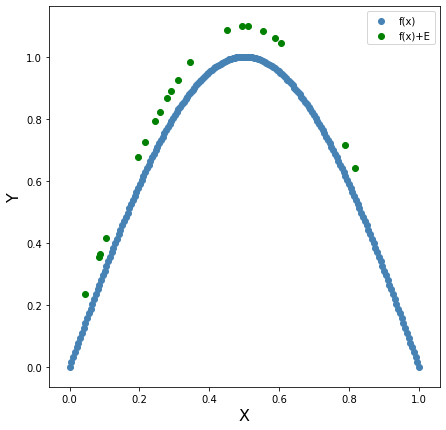

In [151]:
n = 20
x, y = sample(n, sigma=.15)
xplot = np.linspace(0, 1, 200)
fplot = get_f(xplot)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
fx=[]
# YOUR CODE HERE
ax.scatter(xplot, fplot, marker="o", color="steelblue", label="f(x)")
ax.scatter(x, y, marker="o", color="green", label="f(x)+E")
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.legend(loc="upper right")
#raise NotImplementedError()

**Part B [6 points]**: **[3 points]** Next we need to create a function that can fit a polynomial model to training data and make predictions for unseen data.  Complete the function `poly_predict` below to accomplish this.  Note that there are many ways to do this in Python.  Later this week we'll look into doing this with Scikit-Learn.  You're free to implement it using Scikit-Learn, but you might want to look into Numpy's polynomial fitting functions, [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) and [polyval](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html).


In [152]:
def poly_predict(x_train, y_train, x_valid, deg):
    """
    Function to train polynomial regression model on training data
    and then return a vector of predictions on validation data
    
    :@param x_train: vector of training features
    :@param y_train: vector of training responses
    :@param x_valid: vector of validation features to make predictions with
    :@param deg: degree of the polynomial model 
    """
    
    # YOUR CODE HERE
    coefs = np.polyfit(x_train, y_train, deg)
    ffit = np.polyval(coefs,x_valid)
    return ffit
    #raise NotImplementedError()

**[3 points]**: Demonstrate that your function is working by using it to generate a plot that include the true function $f(x)$, a scatter plot of your training data, and the curve representing your fitted model. 

(200,) (200,)


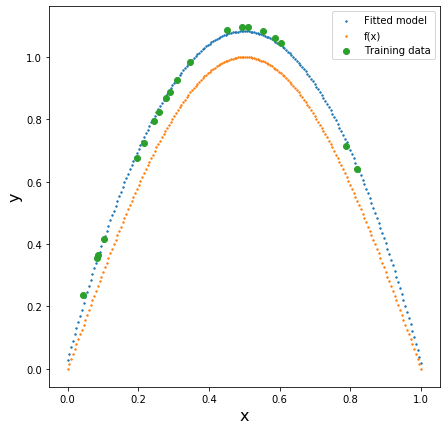

In [156]:
model_plot = poly_predict(x, y, xplot, 2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

# YOUR CODE HERE
print(xplot.shape,model_plot.shape)
ax.scatter(xplot,model_plot,s=2,label="Fitted model")
ax.scatter(xplot,get_f(xplot),s=2,label="f(x)")
ax.scatter(x,y,label="Training data")
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.legend(loc="upper right")
#raise NotImplementedError()

**Part C [12 points]**: Our goal now will be to make a plot of the decomposition of the expected validation MSE into it's constituent parts.  Recall that we showed in lecture that the expected test MSE can be written as 

$$
\textrm{E}\left[\left(y_0 - \hat{f}(x_0) \right)^2\right] = \left[~f(x_0) - \textrm{E}[~\hat{f}(x_0)~] \right]^2
+ \textrm{E}\left[ ~ \textrm{E}[~\hat{f}(x_0)]-\hat{f}(x_0)~\right]^2 + \textrm{Var}(\epsilon)
= \left[\textrm{Bias}(~\hat{f}(x_0)\right]^2 + \textrm{Var}(~\hat{f}(x_0)~) + \textrm{Var}(\epsilon)
$$

where $x_0$ represents unseen validation data. We're going to run simulations to estimate $\left[\textrm{Bias}(~\hat{f}(x_0)\right]^2$ and $\textrm{Var}(~\hat{f}(x_0)~)$ for different polynomial models and then plot them against estimates of the true validation MSE. The function `bias_variance_study` below will help you do this.  You just need to fill in a few key parts.  At the end of the day, you should have a plot for each combination of the simulation parameters.  

The $\textrm{Bias}^2$ term is given by 

$$
\left[\textrm{Bias}(~\hat{f}(x_0)\right]^2 = \left[~f(x_0) - \textrm{E}[~\hat{f}(x_0)~] \right]^2
$$

The first term inside the square,$~f(x_0)$, is simply the true function $f$ evaluated on the validation data.  The second term inside the square, $\textrm{E}[~\hat{f}(x_0)~]$, is the expected value of all estimated models evaluated on the validation data.  We can estimate this by sampling many many training sets, fitting models, evaluating them on many validation sets, and then taking the average. 

The next step is to estimate the $\textrm{Variance}$.  Let's unpack it 

$$
\textrm{E}\left[ ~ \hat{f}(x_0) - \textrm{E}[~\hat{f}(x_0)]~\right]^2
$$

Note that $\textrm{E}[~\hat{f}(x_0)]$ is the `mean_model` we got from the `squared_bias` function. The other term, $\hat{f}(x_0)$, is a model estimated on a random training set, and then evaluated on the validation set.  Since we're wrapping this whole thing in an expectation, we're going to sample many many training sets, estimate $\hat{f}(x_0)$, and then compute the mean squared deviation between these and the `mean_model`. 

You will add code to the function below to accomplish this. The plotting part is completed for you. Follow the instructions in the comments below to write two loops.

In the first loop, you need to train models of different degrees on the training set and record their validation predictions. You also need to calculate the validation MSE of each model.

In the second loop, you need to calculate for each degree the squared bias, the variance, and the mean validation MSE across all the simulations.

Mean difference between MSE and Bias^2 + variance with sigma=0.4:  0.13958443029021675


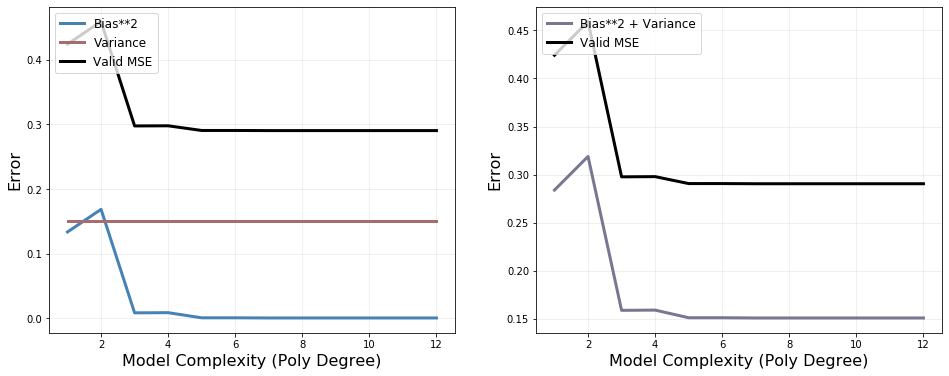

In [157]:
def bias_variance_study(num_data, num_sims, train_frac=0.8, sigma=0.4, max_deg=10, random_state=1234):
    '''
    Function to run simulations and estimate the squared-bias, variance, and 
    validation error of polynomial regression models. 
    
    :@param num_data: number of points in simulated data set 
    :@param num_sims: number of simulations to run 
    :@param train_frac: fraction of total data in training set
    :@param sigma: standard deviation of noise in data 
    :@param max_deg: largest degree polynomial to analyze
    :@param random_state: seed for random state, for reproducibility
    '''
    # Set random seed 
    np.random.seed(random_state)
    
    # array of polynomial degrees
    degrees = range(1, max_deg + 1)
    
    # train/valid split sizes 
    num_train = int(np.ceil(train_frac * num_data))
    num_valid = num_data - num_train
    
    # Generate grid of features and shuffle them 
    x_grid = np.linspace(-1, 1, num_data)
    np.random.shuffle(x_grid)
    
    # Spit into training and validation sets 
    x_train = x_grid[:num_train]
    x_valid = x_grid[num_train:]
    
    # Dictionaries for predictions and MSE measurements
    # Keys are polynomial degree. Each prediction is column 
    # of nValid x num_sims array. Each mse is entry in vector
    # of length num_sims 
    y_hat_valid = {deg: np.zeros((num_valid, num_sims)) for deg in degrees}
    mses_valid = {deg: np.zeros(num_sims) for deg in degrees}
    # Loop over num_sims simulated data sets
    for sim in range(num_sims):
        
        # Generate training and validation responses 
        y_train = get_y(x_train, sigma=sigma)
        y_valid = get_y(x_valid, sigma=sigma)
        
        # Loop over polynomial degree. Use function from part B 
        # to fit to training set and predict on validation set.
        # Store predictions those predictions in yHatValid[deg]
        
        # YOUR CODE HERE
        for deg in degrees:
            y=poly_predict(x_train, y_train, x_valid, deg)
            j=0
            for i in range(len(y_hat_valid[deg])):
                y_hat_valid[deg][i][sim]=y[j]
                j=j+1
            mses_valid[deg][sim] = np.mean(np.square(y - y_valid))  # E[(y0-f(x0))^2]
        #raise NotImplementedError()
        
    # Loop over each polynomial degree and compute squared-bias, variance, 
    # and mean MSE on validation set.  
    bias_squared, variance, mse_valid = np.zeros(max_deg), np.zeros(max_deg), np.zeros(max_deg) 
    
    # YOUR CODE HERE
    for deg in degrees:
        mse_valid[deg-1]=np.mean(mses_valid[deg])
        y_hat=[]
        for x in range(len(y_hat_valid[deg])):
            y_hat.append(np.mean(y_hat_valid[deg][x]))
        bias_squared[deg-1]=np.mean(np.square(get_f(x_valid)-y_hat))
        model=[]
        for i in range(len(y_hat_valid[deg])):
            for j in range(len(y_hat_valid[deg][i])):
                model.append(np.square(y_hat_valid[deg][i][j]-y_hat[i]))
        variance[deg-1]=np.mean(model)
    #raise NotImplementedError()
        
    # Plot squared bias, variance, and validation MSE 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    ax1.plot(degrees, bias_squared, color="steelblue", lw=3, label="Bias**2")
    ax1.plot(degrees, variance, color="#a76c6e", lw=3, label="Variance")
    ax1.plot(degrees, mse_valid, color="black", lw=3, label="Valid MSE")
    ax1.grid(alpha=0.25)
    ax1.set_xlabel("Model Complexity (Poly Degree)", fontsize=16)
    ax1.set_ylabel("Error", fontsize=16)
    ax1.legend(loc="upper left", fontsize=12)
    ax2.plot(degrees, bias_squared + variance, color="#777791", lw=3, label="Bias**2 + Variance")
    ax2.plot(degrees, mse_valid, color="black", lw=3, label="Valid MSE")
    ax2.grid(alpha=0.25)
    ax2.set_xlabel("Model Complexity (Poly Degree)", fontsize=16)
    ax2.set_ylabel("Error", fontsize=16)
    ax2.legend(loc="upper left", fontsize=12)
    print("Mean difference between MSE and Bias^2 + variance with sigma={}: ".format(sigma), 
          np.mean(mse_valid-bias_squared-variance))
    
    # Return arrays of squared-Bias, variance, and MSE 
    return bias_squared, variance, mse_valid
    

bias_squared, variance, mse_valid = bias_variance_study(30, 500, train_frac=0.80,sigma=0.4, max_deg=12,random_state=1241)

**Part D [6 points]**: When everything is working, increase the size of the simulated data sets and the number of simulation runs and compare the difference between the validation MSE and the sum of the squared-Bias the Variance for each polynomial degree.  Try this for several values of the standard deviation of the model noise.  What do you notice?  How can you explain this result using the notions of Bias-Variance and Reducible and Irreducible error discussed in class?   

It can be noticed that as the size of the simulated data sets and the number of simulation runs increases, the bias decreases and the variance increases. 
High bias means even with all training data, the error is still high. Model is not flexible.
High variance means that even a small variation in the training data causes a great change in the learned model. Model is too sensitive. 

Mean difference between MSE and Bias^2 + variance with sigma=0.5:  0.24852219014573687
Mean difference between MSE and Bias^2 + variance with sigma=0.625:  0.3882447780908116
Mean difference between MSE and Bias^2 + variance with sigma=0.75:  0.5590041821993427
Mean difference between MSE and Bias^2 + variance with sigma=0.875:  0.7608004024713297
Mean difference between MSE and Bias^2 + variance with sigma=1.0:  0.9936334389067731


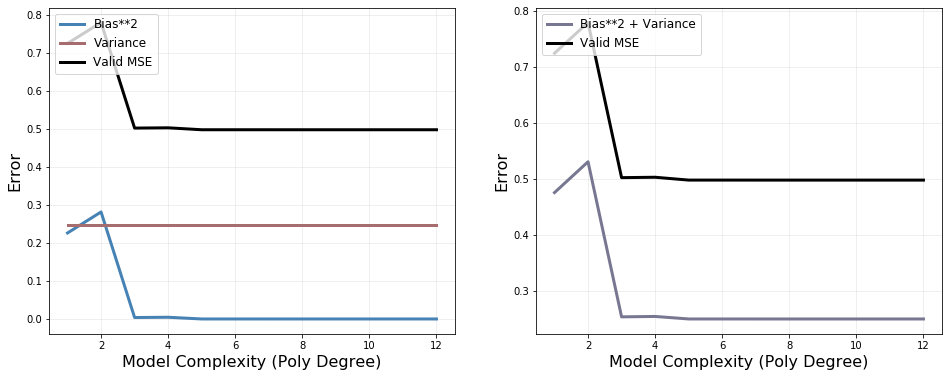

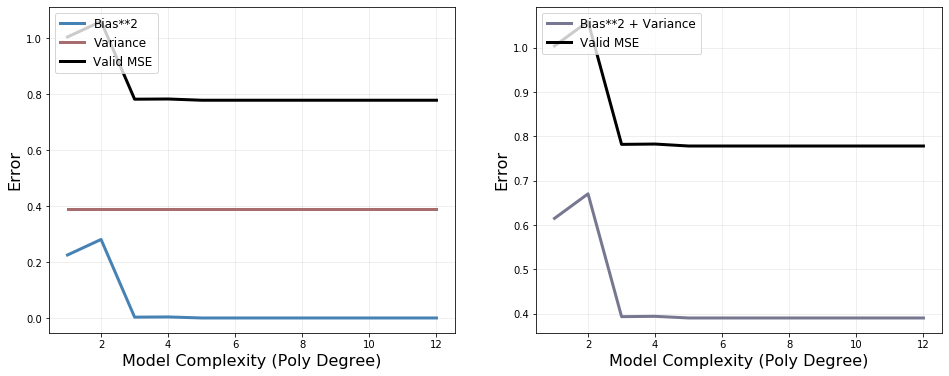

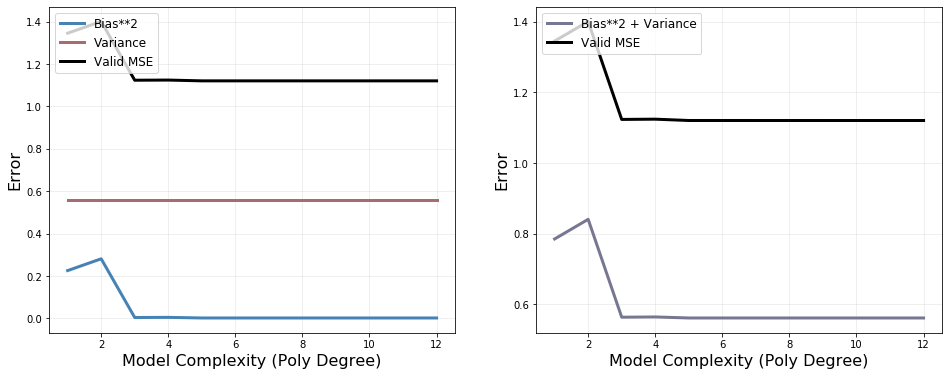

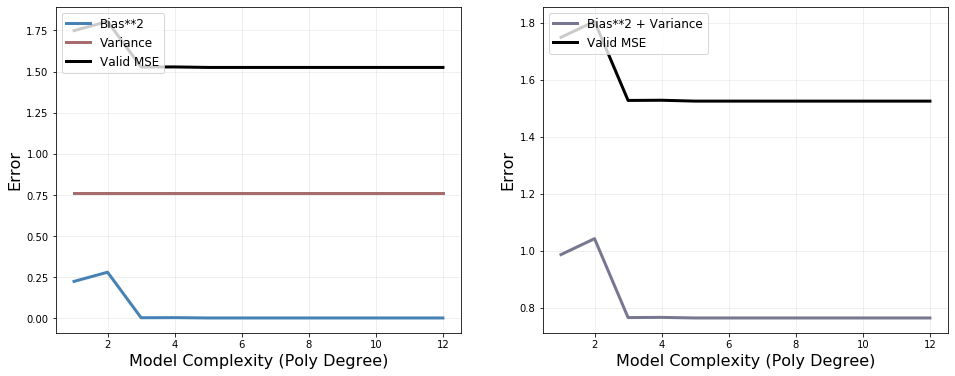

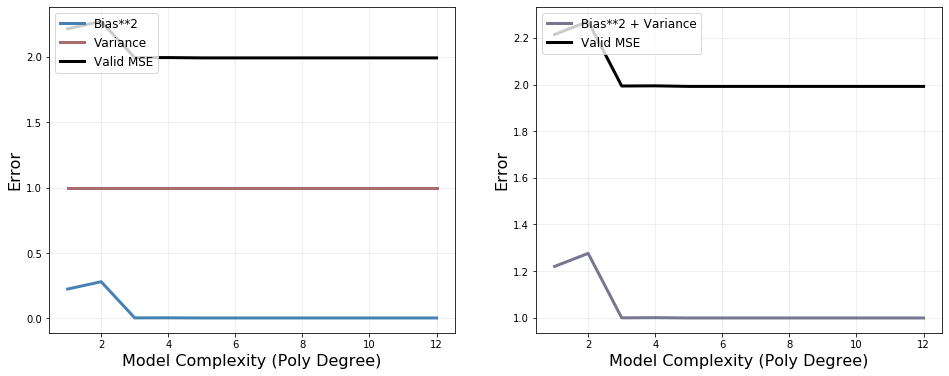

In [125]:
# YOUR CODE HERE
num_data=100
num_sims=1000
sigma=np.linspace(0.5,1,5)
for noise in sigma:
    bias_squared, variance, mse_valid = bias_variance_study(num_data,num_sims,train_frac=0.80,sigma=noise, max_deg=12,random_state=1241)
#raise NotImplementedError()

### [5 points] Problem 4: Syllabus quiz
***

Please read the [syllabus](https://github.com/BoulderDS/CSCI5622-machine-learning/blob/master/info/syllabus.md) carefullly and finish the [Syllabus quiz](https://forms.gle/sMs3dH61ZKVXKPyW8). You do not need to answer anything here. The Markdown cell is only for grading convenience.

YOUR ANSWER HERE

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/jaqWhB5q1TQdHZvj7) to solicit your feedback for how to improve the course.